

analise de 250000 valores


simples          > threads (0)
1699.952930 ms   > 1681.291440 ms  : tempo execução médio
1684.196700 ms   > 1657.364300 ms  : execução mais rápida
1709.024800 ms   > 1695.561100 ms  : execução mais lenta
121299           > 121299         : média de números primos encontrados

SpeedUp = 1.011099497419674



simples          > threads (20)
1701.892770 ms   > 1765.598870 ms  : tempo execução médio
1686.125600 ms   > 1751.958100 ms  : execução mais rápida
1715.506600 ms   > 1777.293600 ms  : execução mais lenta
121299           > 121299         : média de números primos encontrados

SpeedUp = 0.9639181350404917
Fração serial = 97.74324993460077



simples          > threads (40)
1701.134320 ms   > 1765.637550 ms  : tempo execução médio
1689.233300 ms   > 1757.246000 ms  : execução mais rápida
1714.294400 ms   > 1782.016600 ms  : execução mais lenta
121299           > 121299         : média de números primos encontrados

SpeedUp = 0.9634674568401652
Fração seri

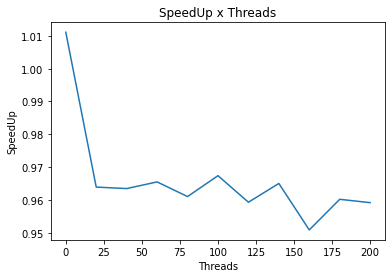

In [1]:
from time import perf_counter_ns
import simples as sp
import mtrhead as mt
import matplotlib.pyplot as plt

def plotGraph(x, y, xLabel, yLabel):
    # plotting the points
    plt.plot(x, y)

    # naming the x axis
    plt.xlabel(xLabel)
    # naming the y axis
    plt.ylabel(yLabel)
    
    graphTitle = yLabel + " x " + xLabel

    # giving a title to my graph
    plt.title(graphTitle)

    # function to show the plot
    plt.show()

def main():

    with open("data.csv") as file:
        data = [line.strip() for line in file]

    data = list(map(int, data))

    print('\n\nanalise de %d valores\n\n'%(len(data)))
    
    threadsUsed = []
    
    allSpeedUp = []

    for threads in range(0,201,20):
        threadsUsed.append(threads)

        simple_time_array = []
        simple_primes_found = []
        fastest_simple_execution = 999999.99
        slowest_simple_execution = 0

        thread_time_array = []        
        thread_primes_found = []
        fastest_thread_execution = 999999.99
        slowest_thread_execution = 0

        for i in range(10):
            start1 = perf_counter_ns()
            prime_sp = sp.resolve_simples(data)
            simple_primes_found.append(prime_sp)
            finish1 = perf_counter_ns()
            simple_time = (finish1-start1)/1000000
            simple_time_array.append(simple_time)
            
            if (simple_time < fastest_simple_execution):
                fastest_simple_execution = simple_time
                
            if (simple_time > slowest_simple_execution):
                slowest_simple_execution = simple_time

            start2 = perf_counter_ns()
            prime_mt = mt.resolve_trhread(data, threads)
            thread_primes_found.append(prime_mt)
            finish2 = perf_counter_ns()
            thread_time = (finish2-start2)/1000000
            thread_time_array.append(thread_time)
            
            if (thread_time < fastest_thread_execution):
                fastest_thread_execution = thread_time
                
            if (thread_time > slowest_thread_execution):
                slowest_thread_execution = thread_time

        all_simple_times = 0
        all_simple_primes = 0

        all_thread_times = 0
        all_thread_primes = 0

        for i in range(10):
            all_simple_times += simple_time_array[i]
            all_simple_primes += simple_primes_found[i]
            
            all_thread_times += thread_time_array[i]
            all_thread_primes += thread_primes_found[i]


        average_simple_time = all_simple_times/len(simple_time_array)
        average_simple_primes = all_simple_primes/len(simple_primes_found)
        
        average_thread_time = all_thread_times/len(thread_time_array)
        average_thread_primes = all_thread_primes/len(thread_primes_found)

        SpeedUp = average_simple_time/average_thread_time
        allSpeedUp.append(SpeedUp)

        print('simples          > threads (%d)'%(threads))
        print('%f ms   > %f ms  : tempo execução médio'%(average_simple_time,average_thread_time))
        print('%f ms   > %f ms  : execução mais rápida'%(fastest_simple_execution,fastest_thread_execution))
        print('%f ms   > %f ms  : execução mais lenta'%(slowest_simple_execution,slowest_thread_execution))
        print('%d           > %d         : média de números primos encontrados\n'%(average_simple_primes,average_thread_primes))
        print('SpeedUp =', SpeedUp)
        if (threads != 0):
            serial_fraction = (((100*threads)/SpeedUp)-100)/threads-1
            print('Fração serial =', serial_fraction)
        print()
        print("===========================================================\n\n")

    print("Terminou a execução")
    
    plotGraph(threadsUsed, allSpeedUp, "Threads", "SpeedUp")
    
main()
